## Distribution of Predictors

         YearBuilt         SqFt      Story      Acres      Baths  Fireplaces  \
count    89.000000    89.000000  89.000000  89.000000  88.000000   89.000000   
mean   1975.471910  1750.921348   1.365169   0.418427   2.022727    0.741573   
std      16.600308   735.717927   0.446031   0.326472   0.591652    0.465347   
min    1909.000000   705.000000   1.000000   0.000000   1.000000    0.000000   
25%    1965.000000  1219.000000   1.000000   0.210000   1.875000    0.000000   
50%    1981.000000  1590.000000   1.000000   0.320000   2.000000    1.000000   
75%    1987.000000  2102.000000   1.750000   0.500000   2.500000    1.000000   
max    1998.000000  4650.000000   2.500000   1.530000   3.000000    2.000000   

                Zip         Value  
count     89.000000  8.900000e+01  
mean   27576.730337  2.168405e+05  
std       42.551777  1.496675e+05  
min    27502.000000  3.218400e+04  
25%    27529.000000  1.259290e+05  
50%    27604.000000  1.771320e+05  
75%    27610.000000  2.9511

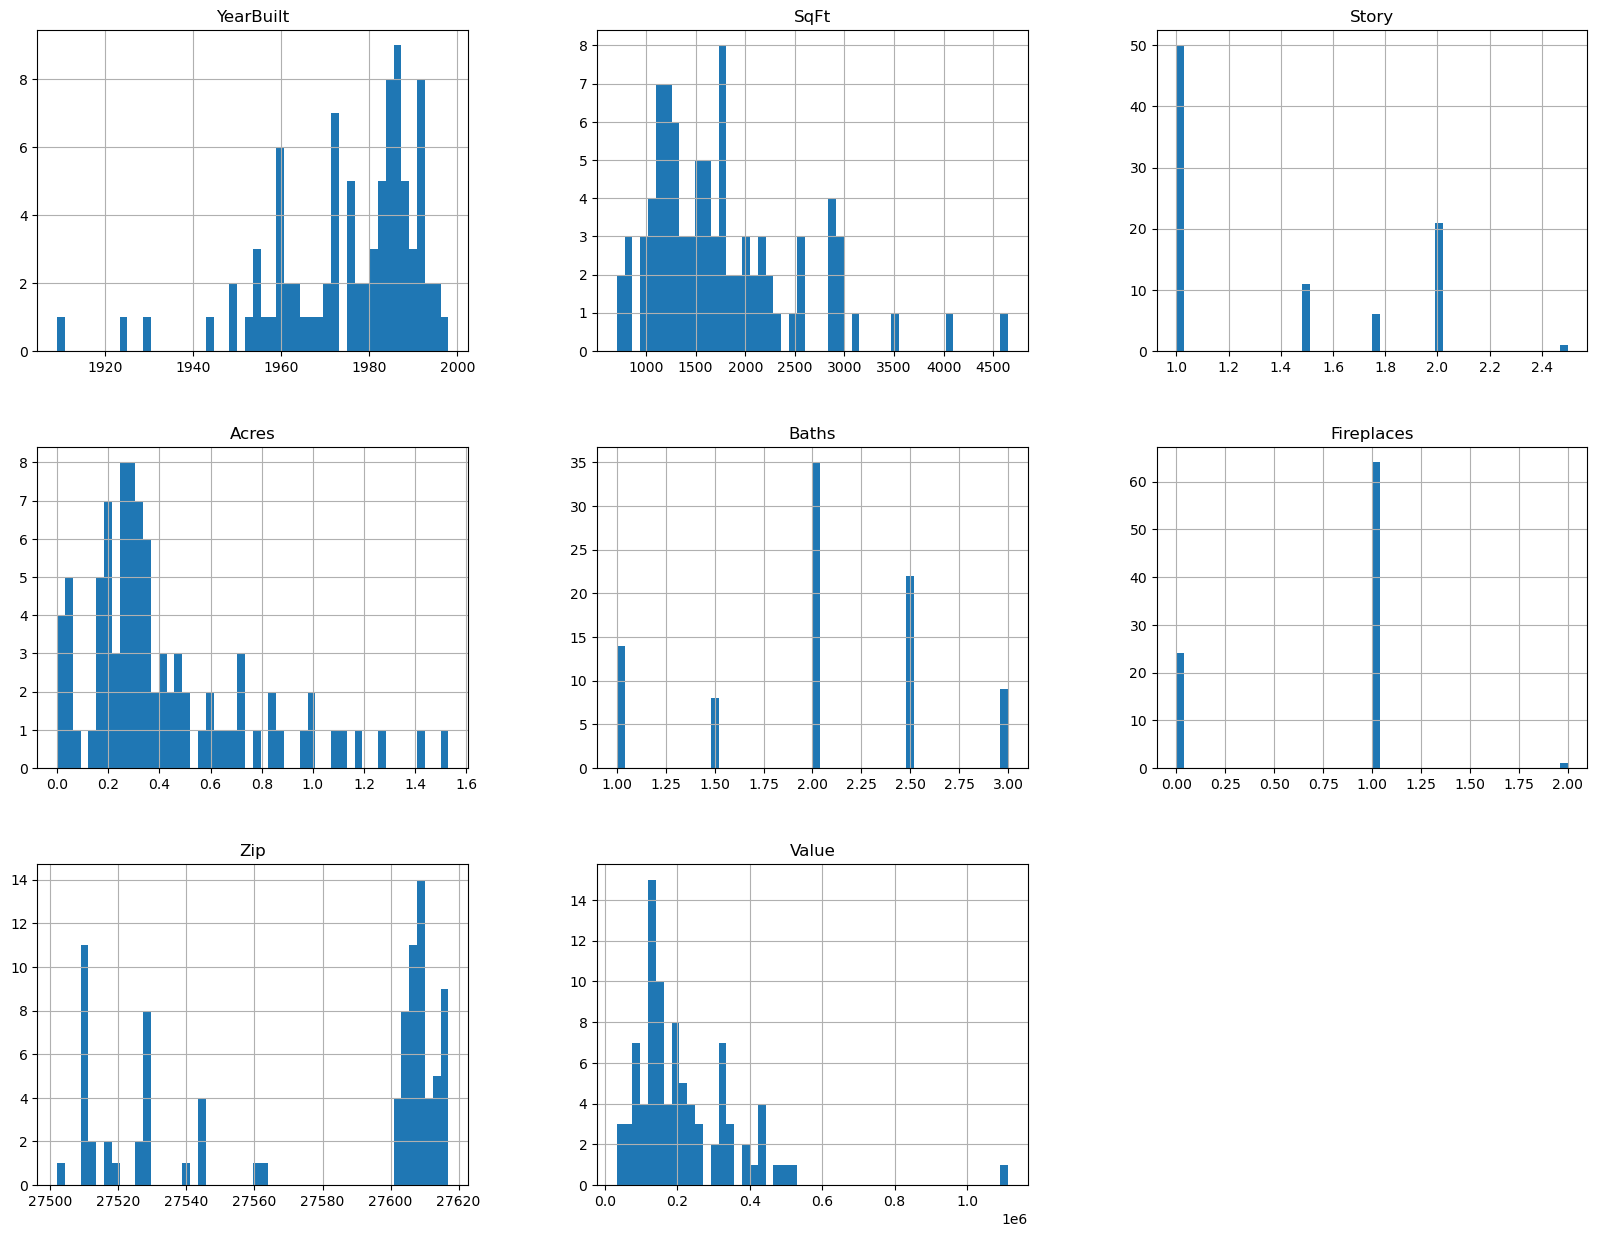

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('../data/rawdata/train.csv')
df_test = pd.read_csv('../data/rawdata/test.csv')

## delete the potential error data - 5th row
df = df.drop([4], axis=0)
## Drop the column 'Id' from the data
df = df.drop(['ID'], axis=1)

# Generate data description
description = df.describe(include='all')
print(description)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# Plot the distribution of data
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
# Example
df.head(2)

,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,Zip,Value
0,1990,2102,1.0,0.77,NaN,1,27603,203200
1,1986,1740,1.5,0.06,3.0,1,27604,119096


In [10]:
df_test.head(2)

,ID,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,ZIP
0,1,1967,1752,1.00,0.29,1.5,1,27604
1,2,1987,2678,1.75,0.17,3.0,1,27613


## Range of Predictors in Train and Test Data
Conclusions:
- The range of predictors in the test is covered by that of the train data.
- The range of predictors lies in the central region of the train data. Potential enough information for reference.

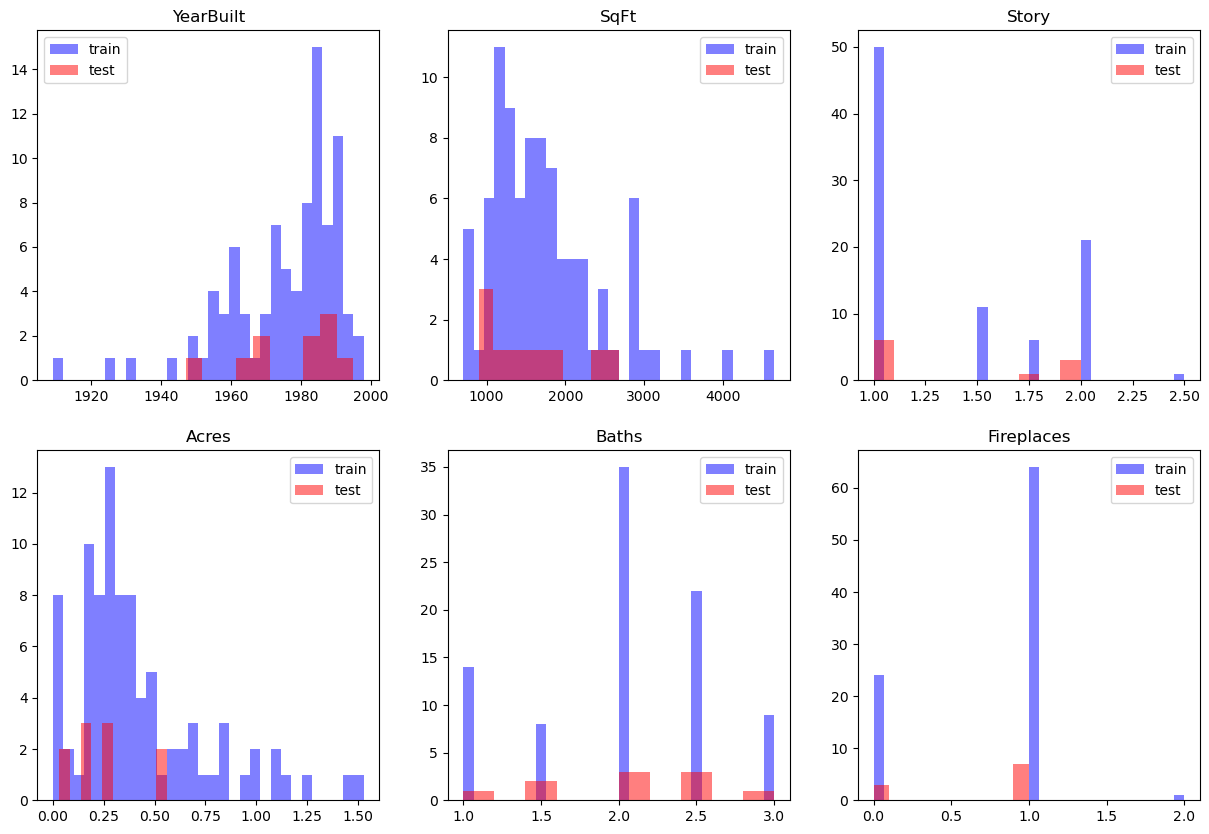

In [ ]:
import matplotlib.pyplot as plt

# List of predictors
predictors = ['YearBuilt', 'SqFt', 'Story', 'Acres', 'Baths', 'Fireplaces']

# Plot overlapping histograms
# 2 by 3 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for predictor in predictors:
    i, j = divmod(predictors.index(predictor), 3)
    axs[i, j].hist(df[predictor], bins=30, alpha=0.5, color='b', label='train')
    axs[i, j].hist(df_test[predictor], bins=30, alpha=0.5, color='r', label='test')
    axs[i, j].set_title(predictor)
    axs[i, j].legend()